
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import scipy.stats as stats
from scipy.stats import kstest

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [6]:
alpha = 0.05

In [7]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

Comenzamos por obtener los estadísticos necesarios para la construcción del intervalo de confianza.

In [8]:
meanA = groupA.mean()
meanB = groupB.mean()
stdA = groupA.std()
stdB = groupB.std()

estimador_puntual = round(meanA - meanB, 2)
sample_std = round(stdA - stdB, 2)

N_A = groupA.count()
N_B = groupB.count()


**Estimador puntual de la diferencia de medias:**

In [9]:
print(f'Un estimador puntual de la diferencia de medias entre el grupo A y el B es: {estimador_puntual}')


Un estimador puntual de la diferencia de medias entre el grupo A y el B es: 23262.37


**Construcción del intervalo de confianza:**

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


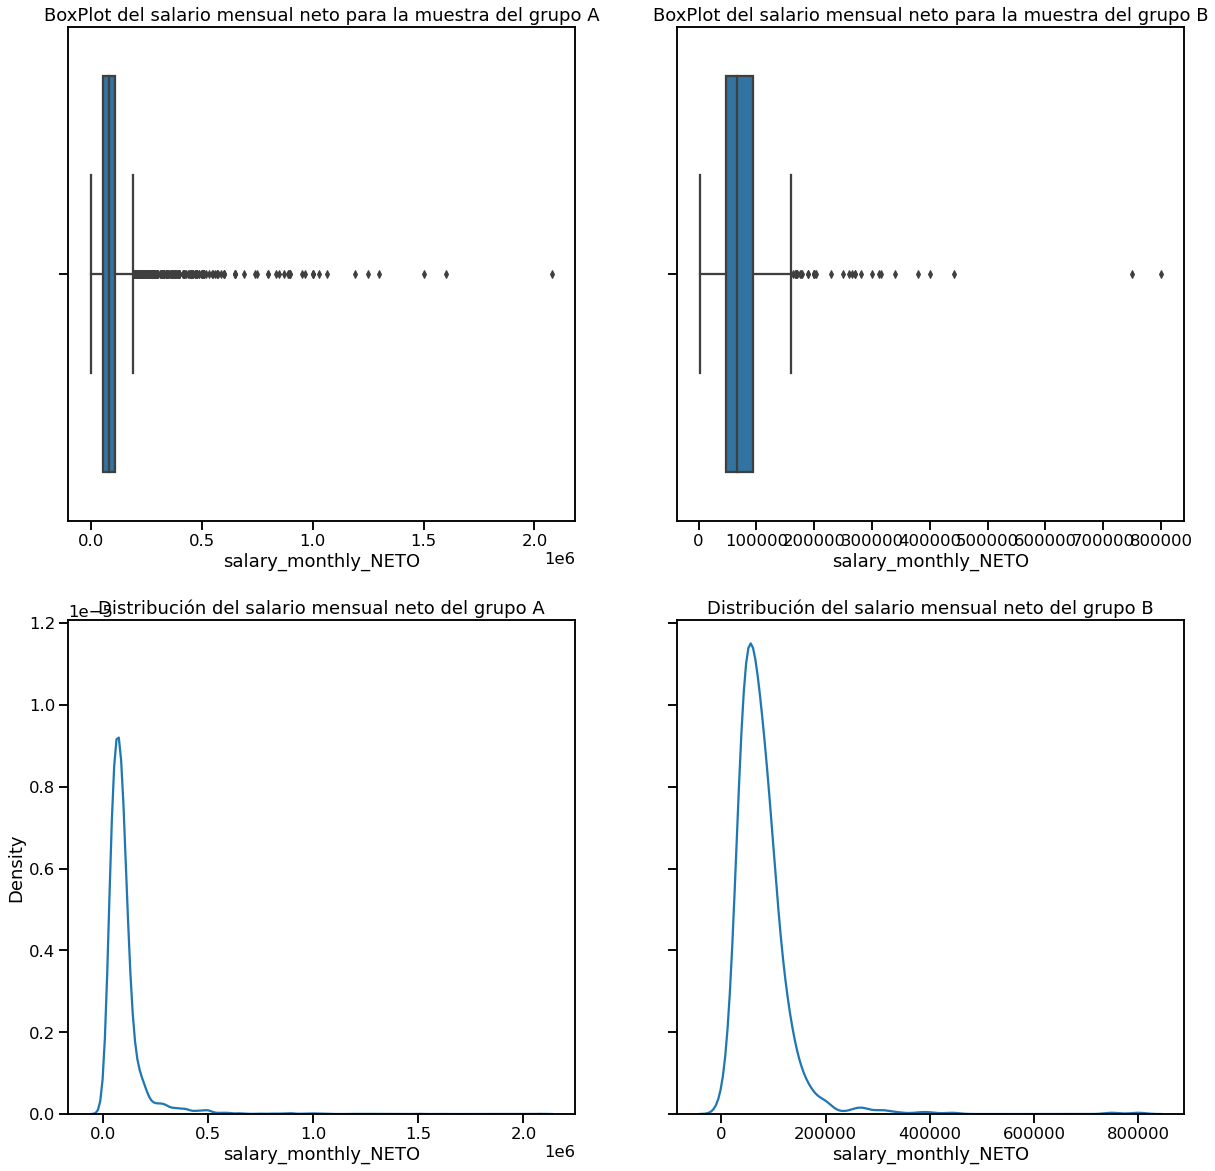

In [10]:
#Antes de construir el intervalo tenemos que saber si podemos considerar varianzas iguales o distintas. Lo veamos por medio de gráficos
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20), sharey='row')
seaborn.boxplot(groupA, ax=ax[0,0]).set(title='BoxPlot del salario mensual neto para la muestra del grupo A')
seaborn.boxplot(groupB, ax=ax[0,1]).set(title='BoxPlot del salario mensual neto para la muestra del grupo B')

seaborn.kdeplot(data=groupA, ax=ax[1,0]).set(title='Distribución del salario mensual neto del grupo A')
seaborn.kdeplot(data=groupB, ax=ax[1,1]).set(title='Distribución del salario mensual neto del grupo B')

plt.ticklabel_format(style='plain', axis='x') 

plt.show()

Las cajas de los boxplot difieren de su ancho por lo que podemos sospechar que son distintas. El test de Levene nos informa acerca de la homogeneidad de las varianzas de ambos grupos. Las hipótesis a contrastar son:

$H_0:\frac{\sigma_A}{\sigma_B}=1$

$H_1:\frac{\sigma_A}{\sigma_B} \neq 1$

In [11]:
# Levene test
# ==============================================================================
levene_test = stats.levene(groupA, groupB, center='mean')
print(f'P-valor = {levene_test[1]}')

P-valor = 1.563076059819447e-09


**Decisión:** como  $p$ -valor  $<<<α=0.05$ , se rechaza  $H_0$ .

**Conclusión**: Hay evidencia estadísticamente significativa para afirmar que la varianza del grupo A y del grupo B son distintas.

A continuación analizamos si los datos de las muestras provienen de una distribución normal para determinar si el intervalos será asintótico o no.
Los graficos qqplot nos sirve para intuir si las muestras van a tener distribucion normal (se comparan los quantiles teoricos de una N(0,1) con los muestrales)

D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
D:\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


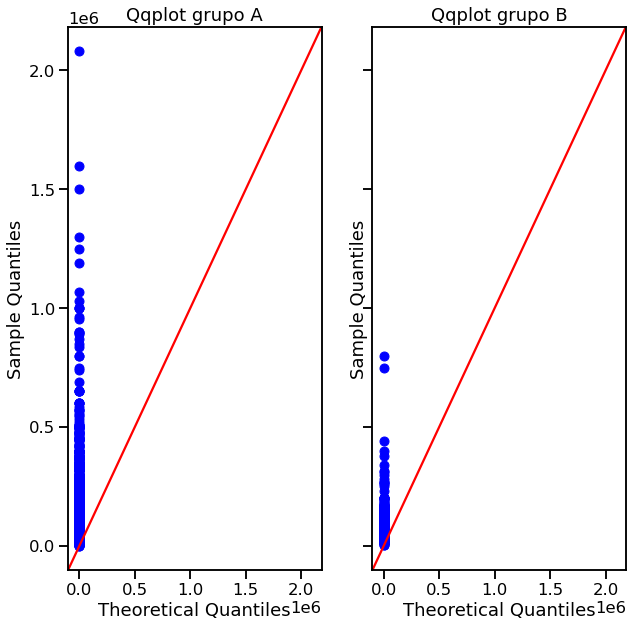

In [12]:

from statsmodels.graphics.gofplots import qqplot
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10), sharey='row')

qqplot(groupA , line='45', ax=ax[0])
ax[0].set_title('Qqplot grupo A') 

qqplot(groupB , line='45', ax=ax[1] )

ax[1].set_title('Qqplot grupo B') 


plt.show()



Los puntos azules (cuantiles muestrales) deberían caer en la linea roja 
(cuantiles teóricos para esos valores de la muestra), o estar muy cercanos a 
ella. 
Claramente esto no sucede aquí, luego las muestras no provienen de una 
distribución normal.

Por medio de los test correspondientes, verificamos lo que se aprecia en los gráficos:

In [13]:
#Shapiro-Wilk test

from scipy.stats import norm, kstest

def probability_is_normal(data):

  """
  https://stackoverflow.com/questions/46678239/p-value-is-0-when-i-use-scipy-stats-kstest-for-large-dataset
  """
  loc, scale = norm.fit(data)
  # create a normal distribution with loc and scale
  n = norm(loc=loc, scale=scale)
  return kstest(data, n.cdf)[1]  #pvalue on second position

print(f'P-valor para groupA: {probability_is_normal(groupA)}')
print(f'P-valor para groupB: {probability_is_normal(groupB)}')

P-valor para groupA: 8.156377970171486e-237
P-valor para groupB: 1.0373672430655502e-20


El test de Shapiro-Wilk muestra que efectivamente las distribuciones de ambas muestras no son normales, ya que el $p$-valor es prácticamente cero. Es decir, la probabilidad de que las muestras provengan de poblaciones con distribución normal se puede considerar nula.

Las hipótesis que manejamos aquí son:

$H_0:$ La muestra groupA (groupB) proviene de una población con distribución normal.

$H_1:$ La muestra groupA (groupB) no proviene de una población con distribución normal.

**Decisión**: como $p$-valor $<<< \alpha=0.05$, se rechaza $H_0$ (esta decisión es compartida para ambos grupos).

**Conclusión**: Hay evidencia estadísticamente significativa para decir que la muestra groupA (groupB) no proviene de una distribución normal.


**Construcción del intervalo de confianza:** enfoque teórico en base a los resultados de los test.

Dada las dos muestras A y B con tamaños muestrales $n_A$ y $n_B$, respectivamente. Si sus varianzas $s_{A}^{2}$ y $s_{B}^{2}$ son distintas, vamos a utilizar como pivote para la construcción del intervalo de contianza del 95%, el estadístico de la prueba $t$ de Welch. Este pivote se construye con la siguiente fórmula:

$$
t=\frac{(\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B})}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}}
$$

y tiene una distribución $t$ de Student con $f$ grados de libertad dados por la ecuación de Welch-Sattertwaite, la cual se expresa como:

$$
\text { f }=\frac{\left(s_{A}^{2} / n_{A}+s_{B}^{2} / n_{B}\right)^{2}}{\left(s_{A}^{2} / n_{A}\right)^{2} /\left(n_{A}-1\right)+\left(s_{B}^{2} / n_{B}\right)^{2} /\left(n_{B}-1\right)}
$$



Moore* también propone obtener los grados de libertad $f$ con la siguiente expresión:

$$f=min\{n_A , n_B \}-1$$

sobre todo cuando no contamos con una computadora, la fórmula anterior nos brinda una herramienta sencilla para hacer los cálculos a mano.


Entonces, el intervalo de confianza quedará construido de la siguiente manera**:

Para $\alpha = 0.05$:
$$P\left(\hat{\theta}_{1} \leq \theta \leq \hat{\theta}_{2}\right)=1-\alpha$$

Donde $ \theta = \mu_A - \mu_B$ y,  $\hat{\theta}_{1}, \hat{\theta}_{2}$ son los extremos del intervalo a calcular utilizando la información de que el pivote sigue una distribución $t$ de Student con $f$ grados de libertad.

$$
P\left(-t_f \leq \frac{(\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B})}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}} \leq t_f\right)=0.95
$$


$$
P\left(-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}} \leq (\bar{X_A}-\bar{X_B})-(\mu_{A}-\mu_{B}) \leq t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}\right)=0.95
$$

$$
P\left((\bar{X_A}-\bar{X_B})-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}} \leq (\mu_{A}-\mu_{B}) \leq (\bar{X_A}-\bar{X_B})+t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}\right)=0.95
$$


Así:

$\hat{\theta}_{1}= (\bar{X_A}-\bar{X_B})-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}$

y

$\hat{\theta}_{2}= (\bar{X_A}-\bar{X_B})+t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}$


Nota: $t_f$ es el percentil correspondiente a una probabilidad acumulada de $97.5\%$ de una distribución $t$ de Student con $f$ grados de libertad. Por simplicidad en la notación usamos $t_{f,0.975}=t_f$.

(*) David Moore, Estadística Aplicada Básica, segunda edición.

(**) Supondremos un intervalo de confianza asintótico, pues las muestras no provienen de distribuciones normales.


In [14]:
#Grados de libertad propuesto por Welch
N=((stdA**2/N_A)+ (stdB**2/N_B))**2 
D=(stdA**2/N_A)**2 / (N_A-1) + (stdB**2/N_B)**2 / (N_B-1)
f_W=round(N/D) 
#---------------------------------------------------------------
#Grados de libertad usando el mínimo entre N_A y N_B
f_M=np.min([N_A, N_B])-1 



In [15]:
#percentil 97.5% de una t de student con f_M grados de libertad
t = stats.t(f_M)
confianza=0.95
t_f = np.abs(t.ppf((1-confianza)/2)) #saca el percentil para alpha=0.05/2 de una t de Student con f_M grados de libertad (esto es lo que sería nuestro z0975 si la distribución fuese N(0,1))
print('El percentil que corresponde a f_M=',f_M, 'grados de libertad y una probabilidad acumulada de', confianza*100+(alpha*100)/2,'%', 'es:', round(t_f,3))

El percentil que corresponde a f_M= 890 grados de libertad y una probabilidad acumulada de 97.5 % es: 1.963


In [16]:
#Construcción de intervalo de confianza asintótico para la diferencia de medias usando el pivote con f_M= 890 gdl
theta_cop_1= estimador_puntual - t_f * np.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite inferior del intervalo
theta_cop_2= estimador_puntual + t_f * np.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite superior del intervalo

print('IC= (', round(theta_cop_1,3), ',', round(theta_cop_2,3), ')')
print('La longitud del intervalo construido con', f_M, 'grados de libertad es ', round(theta_cop_2-theta_cop_1,3))

IC= ( 18554.261 , 27970.479 )
La longitud del intervalo construido con 890 grados de libertad es  9416.218


In [17]:
#Construcción de intervalo de confianza asintótico para la diferencia de medias usando el pivote con f_W= 2148 gdl
t_W = stats.t(f_W)
t_f_W = np.abs(t_W.ppf((1-confianza)/2))

print('El percentil que corresponde a f_W=',f_W, 'grados de libertad y una probabilidad acumulada de', confianza*100+(alpha*100)/2,'%', 'es:', round(t_f_W,3))


El percentil que corresponde a f_W= 2148 grados de libertad y una probabilidad acumulada de 97.5 % es: 1.961


In [18]:
theta_cop_1_W= estimador_puntual - t_f_W * np.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite inferior del intervalo
theta_cop_2_W= estimador_puntual + t_f_W * np.sqrt((stdA**2/N_A)+ (stdB**2/N_B)) #limite superior del intervalo

print('IC_W= (', round(theta_cop_1_W,3), ',', round(theta_cop_2_W,3), ')')
print('La longitud del intervalo construido con', f_W, 'grados de libertad es ', round(theta_cop_2_W-theta_cop_1_W,3))

IC_W= ( 18558.013 , 27966.727 )
La longitud del intervalo construido con 2148 grados de libertad es  9408.714


Notar que el intervalo construido a partir de una distribución $t$ de Student con más grados de libertad es más preciso que el construido con menos gdl. Nos quedaremos con el intervalo de confianza de menor longitud.

El intervalo de confianza  del $95 \text{%}$ para la diferencia de medias obtenido a partir de las muestras A y B es: $$IC_W= ( 18558.013 , 27966.727 )$$

**Interpretación**: Hay **aproximadamente** un $95 \text{%}$ de confianza de que el intervalo construido a partir de la diferencia de medias entre el salario mensual neto de los hombres y el salario mensual neto del resto de los géneros, cubra al verdadero valor de dicha diferencia.

Si realizamos el experimento (encuestar, de la forma correcta, a personas de ambos grupos acerca de su salario mensual neto) un número grande $N$ de veces y por cada realización computamos el intervalo obtendríamos **aproximadamente** $0.95 · N$ intervalos que contienen a $\theta$ y los restantes no.
Nuestro intervalo particular $IC_W= ( 18558.013 , 27966.727 )$ forma parte de los $N$ intervalos, con lo cual tenemos una alta chance que forme parte del grupo de $0.95 · N$ intervalos que contiene a $\theta$.




**¿Cómo interpretamos el estimador puntual de la diferencia de medias?** 

El estimador puntual de la diferencia entre las dos medias que obtuvimos en una primera instancia es $\widehat{\mu_A - \mu_B}=\hat{\mu_A } - \hat{\mu_B}= \bar{X_A} - \bar{X_A}= 23262.37$ . Esto significa que, con base a los datos, pareciera que en promedio el salario neto mensual del grupo de hombres (grupo A) es ARG 23.262,37 mayor que el resto de los géneros (grupo B).

**¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?**

Los intervalos de confianza son construidos a partir de un pivote al cual se le asocia una distribución, en este caso, simétrica (en lo mejor de los casos será normal, pero en la práctica la varianza resulta, la mayoría de las veces, no conocida por lo que trabajamos con $t$ de Student). Los percentiles utilizados en la construcción de los límites de un intervalo con $(1-\alpha)\%$ de confianza resultan coincidir con los extremos que delimitan la zona de rechazo o no rechazo del test de hipótesis bilateral:

$H_0: \theta = \theta_0$ 

$H_0: \theta \neq \theta_0$

Bajo $H_0$, el pivote que se utiliza en un intervalo de confianza pasa a formar parte del estadístico de prueba del test, al que llamaremos $\epsilon$.

Contamos así con una forma alternativa de tomar una decisión en una prueba de hipótesis **bilateral**. Para tomar una decisión acerca de éstas hipótesis se pueden seguir dos caminos, tal como se indica a continuación:

a) Realizar la prueba de hipótesis construyendo, para un valor de $\alpha$ especificado, la zona de rechazo $Z=(-\infty,-a] \cup[a,+\infty)$, de donde la zona de no rechazo es $(-a, a)$.

b) Construir un intervalo de confianza para $\theta$ de nivel $(1-\alpha)$. Aquí afirmamos que $\theta_0 \in IC_{(1-\alpha)\%}$ y reconstruimos el estadístico de prueba. Al realizar las operaciones obtendremos una expresión de la forma: $$-a < \epsilon < a$$

donde $-a$ es el percentil $t_{\alpha/2}$ y $a$ es el percentil $t_{1-\alpha/2}$ correspondientes a los utilizados en la construcción del intervalo de confianza.

Bajo esta lógica, si el estadístico de prueba $\epsilon$ cae en la zona de rechazo, entonces rechazamos la hipótesis nula. De lo contrario, no rechazamos.

Cuando afirmamos que $\theta_{0} \in IC_{95\%}$, para un $\alpha=0.05$ y para el caso de diferencia de medias con varianzas distintas, decimos lo siguiente:

$$
(\bar{X_A}-\bar{X_B})-t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}} \leq \theta_0 \leq (\bar{X_A}-\bar{X_B})+t_f \sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}
$$

$$
-t_f \leq \frac{(\bar{X_A}-\bar{X_B})-\theta_0}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}} \leq t_f
$$


lo que más arriba se tradujo como $-a < \epsilon < a$.

Este conjunto delimitado por $-t_f$ y $t_f$ es el que nos provee la zona de no rechazo y, su complemento, la zona de rechazo del test. En una prueba para diferencia de medias nos interesa saber si el valor de $\theta_0=0$ va a caer dentro del intervalo (o no), luego el estadístico de prueba del test de hipótesis, bajo $H_0$, será 


  $$\epsilon=\frac{\bar{X}_A − \bar{X}_B}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}}$$



Notar que si la probabilidad de error de tipo I de un test de hipótesis bilateral es $\alpha$, entonces el intervalo de confianza que se le asocia es uno de tipo $IC_{(1-\alpha)\%}$.



## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula:**

$H_0: \mu_{A}-\mu_{B} = 0$ 

**Hipótesis alternativa:**

$H_1: \mu_{A}-\mu_{B} \neq 0$

En palabras:

$H_0:$ No hay diferencia en la distribución promedio de los salarios entre los grupos A y B.

$H_1:$ La distribución promedio de los salarios entre los grupos A y B es distinta.

**Estadístico (Pivote)**
  * Identificar el estadístico:

Bajo $H_0$, usamos el estadístico de prueba $t$ de Welch

  $$\epsilon=\frac{\bar{X}_A − \bar{X}_B}{\sqrt{\frac{s_{A}^{2}}{n_{A}}+\frac{s_{B}^{2}}{n_{B}}}}$$


  * Escribir qué distribución tiene bajo $H_0$:

  $$\epsilon \sim t_f$$

donde $f$ son los grados de libertad dados por la ecuación de Welch-Sattertwaite dada en el inciso 1 para una distribucion $t$ de Student.

**Nota:**
Los datos, en un **problema** de dos muestras, son dos muestras aleatorias simples independientes cada una de ellas obtenida de una población distinta distribuida
normalmente.
Las pruebas de significación y los intervalos de confianza para la diferencia entre las medias $\mu_1$ y $\mu_2$ de dos poblaciones parten de la diferencia  entre las dos medias muestrales, $\bar{X}_1 − \bar{X}_2$. Con distribuciones no normales, el teorema del límite central garantiza que los procedimientos de cálculo son aproximadamente correctos cuando las muestras son grandes*.


(*) David Moore, Estadística Aplicada Básica, segunda edición.

## 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

**Cálculo del $p$- valor**:

In [19]:
stats.ttest_ind(groupA, groupB, equal_var=False)


Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

Como el $p$-valor $<<< 0.05$, rechazamos $H_0$.

**Interpretación del resultado**

Hay evidencia estadísticamente significativa para decir que la distribución promedio del salario mensual neto del grupo de los hombres es distinta a la distribución promedio del salario mensual neto del resto de los géneros.

Notemos que el estadístico calculado $\epsilon= 9.697$ cae en la zona de rechazo delimitada por el valor $\text{t_f_W = np.abs(t_W.ppf((1-confianza)/2))= 1.961}$

$$Z= (-\infty,-1.961] \cup [1.961, \infty)$$

El valor de t_f_W, representa el valor de $a$ especificado en el inciso 1. 

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [20]:
from statsmodels.stats.power import tt_ind_solve_power

In [21]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [22]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=0.95, ratio=ratio)

492.8117730248978

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


## Respuesta:

Hacer [click aquí](./Grupo_14_Entregable_2_Ejercicio_3.pdf) para abrir el archivo que es la respuesta a este ejercicio.